In [365]:
import os
import sys
import subprocess
from pathlib import Path

repo_root = subprocess.run(
    ["git", "rev-parse", "--show-toplevel"], capture_output=True, text=True
).stdout.strip()

sys.path.append(repo_root)

In [366]:
import numpy as np

import pickle

from utils import splashback

In [367]:
import importlib

importlib.reload(splashback)

<module 'utils.splashback' from '/Users/vinhtran/Data/Research/Mark/TNG Galaxies Classification/tng_galaxies_classification/utils/splashback.py'>

In [368]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, MaxNLocator
import matplotlib as mpl

# define matplotlib style
mpl.style.use('classic')
mpl.rc('xtick', labelsize=23); mpl.rc('ytick', labelsize=23)
mpl.rc('xtick.major', size=15 , width=2)
mpl.rc('xtick.minor', size=8, width=2, visible=True)
mpl.rc('ytick.major', size=15 , width=2)
mpl.rc('ytick.minor', size=8, width=2, visible=True)
mpl.rc('lines',linewidth=3, markersize=20)
mpl.rc('axes', linewidth=2, labelsize=30, labelpad=2.5)
mpl.rc('legend', fontsize=25, loc='best', frameon=False, numpoints=1)

mpl.rc('font', family='STIXGeneral')
mpl.rc('mathtext', fontset='stix')

In [369]:
boundary = 'splashback'

training_stats = pickle.load(open(f'training_result/mlp/{boundary}/training_stats.pkl', 'rb'))
inference_result = pickle.load(open(f'training_result/mlp/{boundary}/inference_result.pkl', 'rb'))

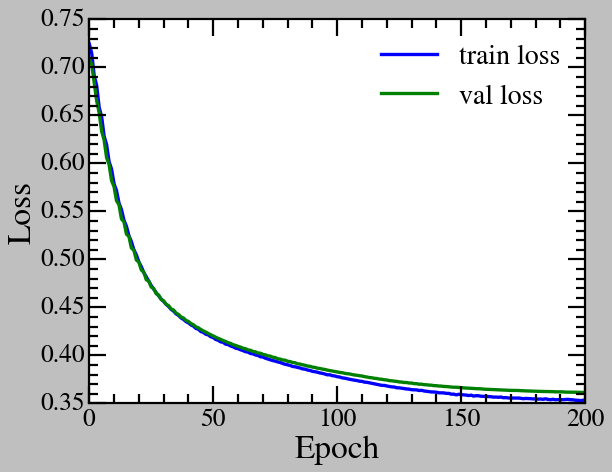

In [370]:
plt.plot(training_stats['train_losses'], label='train loss')
plt.plot(training_stats['val_losses'], label='val loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')

#plt.yscale('log')

plt.legend()
plt.show()

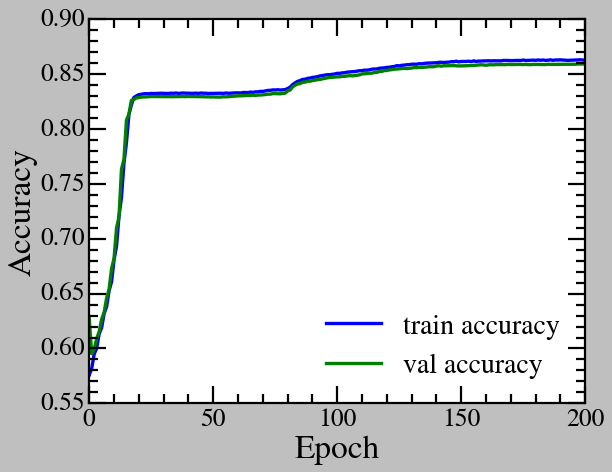

In [371]:
plt.plot(training_stats['train_accuracies'], label='train accuracy')
plt.plot(training_stats['val_accuracies'], label='val accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

In [372]:
best_epoch = np.argmin(training_stats['val_losses'])
print('P_D:',training_stats['val_P_detections'][best_epoch])
print('P_F:',training_stats['val_P_false_alarms'][best_epoch])

P_D: 0.898568312327067
P_F: 0.17999350527922311


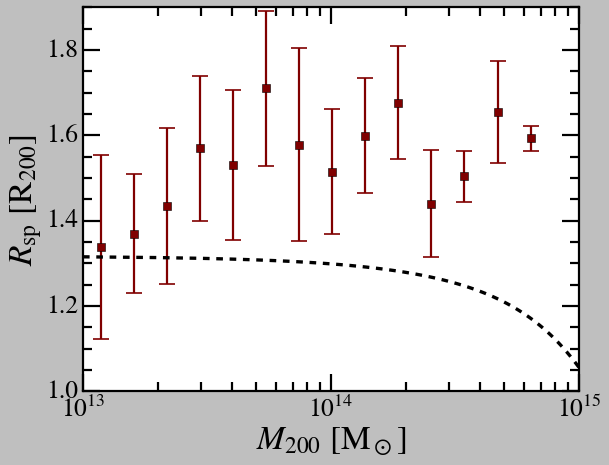

In [373]:
plt.errorbar(1e10*inference_result['mass_bin_centers'],inference_result['radial_boundaries'],inference_result['radial_boundaries_err'],
             fmt=' s',markersize=7.5,elinewidth=2, capsize=7.5, capthick=1.5, color='maroon')
More15_splashback = splashback.More15Splashback()
plt.plot(More15_splashback.m200_bins, More15_splashback.rsp_bins, 'k--', label='More+15')

plt.xlabel(r'$M_{200}$ [M$_\odot$]')
plt.ylabel(r'$R_{\rm{sp}}$ [R$_{200}$]')

plt.xscale('log')

plt.xlim(1e13, 1e15)

plt.show()

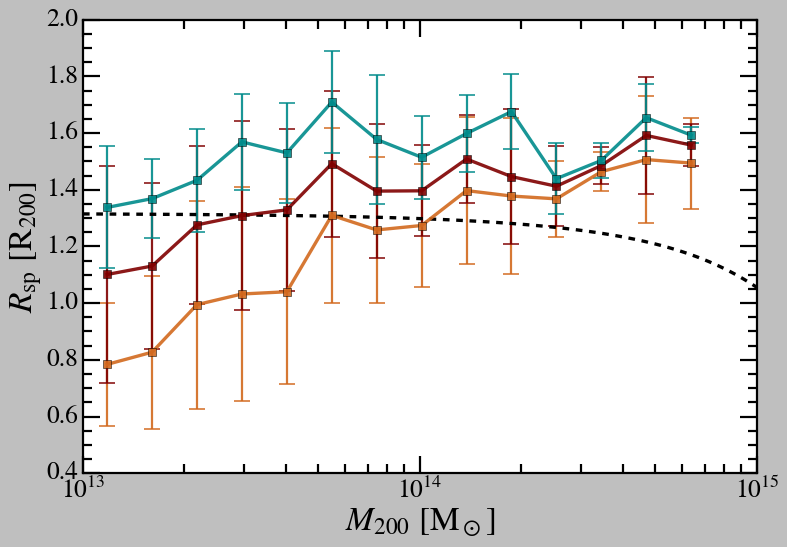

In [382]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

colors = ['chocolate','maroon','darkcyan']
boundaries = ['0.5-2','1-1','splashback']

for boundary,color in zip(boundaries,colors):
    inference_result = pickle.load(open(f'training_result/mlp/{boundary}/inference_result.pkl', 'rb'))
    ax.errorbar(1e10*inference_result['mass_bin_centers'],inference_result['radial_boundaries'],inference_result['radial_boundaries_err'],
                fmt='-s',markersize=7.5,elinewidth=2, capsize=7.5, capthick=1.5, color=color, label=boundary, alpha=0.9)
    
More15_splashback = splashback.More15Splashback()
ax.plot(More15_splashback.m200_bins, More15_splashback.rsp_bins, 'k--', label='More+15')

ax.set_xlabel(r'$M_{200}$ [M$_\odot$]')
ax.set_ylabel(r'$R_{\rm{sp}}$ [R$_{200}$]')

ax.set_xscale('log')

ax.set_xlim(1e13, 1e15)

plt.tight_layout()
plt.show()